In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from bokeh.io import output_notebook,show,curdoc
from bokeh.models import ColumnDataSource, Select, Slider
from bokeh.plotting import figure
from bokeh.layouts import widgetbox, row, column, layout
from wordcloud import WordCloud,STOPWORDS
from os import path
from PIL import Image
df=pd.read_csv('dashboard_x_usa_x_filter_nativeretweets.csv')



In [30]:
# Read in USA Geolocated Twitter dataset
fpath = 'dashboard_x_usa_x_filter_nativeretweets.xlsx'
df = pd.read_excel(fpath, sheetname='Stream')
text = df['Tweet content']

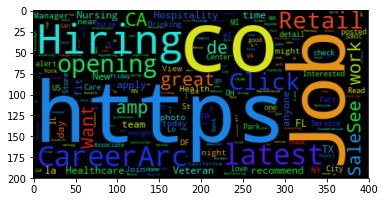

In [31]:
#Worldcloud before preprocessed text
messages = " ".join(text)
wordcloud = WordCloud(background_color="black",max_font_size=100).generate(messages)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [32]:
#preprocessed text to remove emojis,URL:http://,@username,punctions and et
def process_text(tweets):
#Remove emoji
    import re
    emoji=re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweets=emoji.sub(r'',tweets) 
    
#Convert to lower case
    tweets=tweets.lower()
    
#Remove www.* or https?://* 
    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweets)
    
#Remove @username 
    tweets = re.sub('@[^\s]+','USER',tweets)
    
#Remove punctuation
    tweets= re.sub(r'[?|$|.|!|#|\-|"|\n|,|@|(|)]',r'', tweets)
    
#Remove number
    tweets=re.sub(r'[0|1|2|3|4|5|6|7|8|9|:]',r'',tweets)
    
#trim
    tweets = tweets.strip('\'"')
    
    return tweets 

#Transfer pandas.core.series.Series to string
tweet=" ".join(text)
tweets=process_text(tweet)

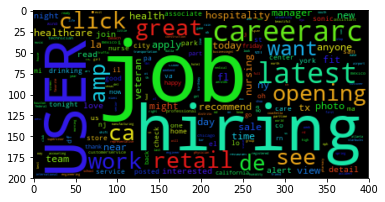

In [33]:
#Worldcloud after preprocessed text
messages=tweets
wordcloud=WordCloud(background_color="black",max_font_size=100).generate(messages)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

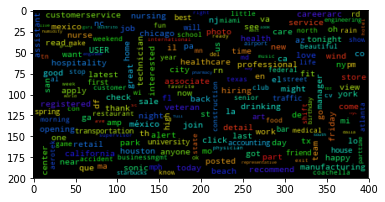

In [34]:
#Worldcloud with small max_font_size
messages=tweets
wordcloud=WordCloud(background_color="black",max_font_size=10).generate(messages)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

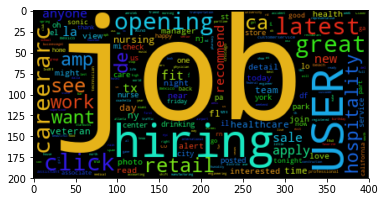

In [35]:
#Worldcloud with large max_font_size
messages=tweets
wordcloud=WordCloud(background_color="black",max_font_size=1000).generate(messages)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

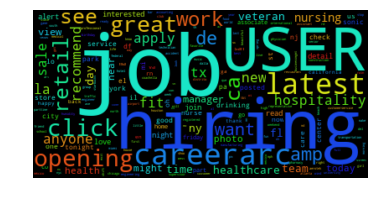

In [42]:
#Worldcloud with stopwords
messages=tweets
# stopwords=set(STOPWORDS)
wordcloud = WordCloud(background_color="black", max_font_size=100,stopwords=stopwords).generate(messages)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

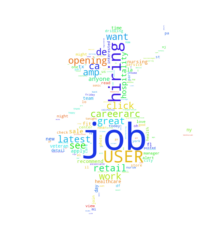

In [45]:
# for fun--Worldcloud with differnet shape
messages=tweets
stopwords=set(STOPWORDS)
alice_mask=np.array(Image.open(path.join(path.dirname('__file__'), "alice_mask.png")))
wordcloud = WordCloud(background_color="white", max_words=150,mask=alice_mask,stopwords=stopwords).generate(messages)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.show()